# 문제정의

- 버섯의 특성 데이터를 이용해서 독버섯인지 식용버섯인지 분류하는 모델을 만들자
- 의사결정트리를 시각화 해보자

- 라벨인코딩, 원핫인코딩


# 데이터 수집

In [5]:
import pandas as pd

mushroom=pd.read_csv("./data/mushroom.csv")
mushroom.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 탐색적 데이터 분석


In [6]:
# 데이터의 형태
mushroom.shape

(8124, 23)

In [7]:
# 결측치 확인 
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
#결측치는 없다
#모든 데이터가 범주형 데이터로 존재

In [9]:
# 특성데이터와 라벨데이터로 분리
X= mushroom.loc[:,"cap-shape":]

y=mushroom.loc[:, "poisonous"]

X.shape , y.shape

((8124, 22), (8124,))

In [10]:
#라벨 데이터의 클래스 확인
y.unique()

array(['p', 'e'], dtype=object)

In [11]:
#라벨 데이터의 클래스의 데이터 수
y.value_counts()


e    4208
p    3916
Name: poisonous, dtype: int64

In [12]:
#countplot()

import seaborn as sb


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

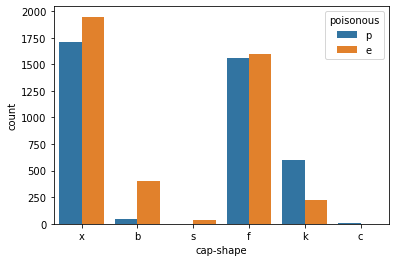

In [13]:
#범주형 데이터에서 클래스의 갯수를 표현하는 경우에 주로 사용
# x: x축값, hue: 색상(x축 값마다의 막대그래프의 개수)
sb.countplot(data=mushroom, x="cap-shape", hue=y)

# 데이터 전처리

- 인코딩(encoding) :범주형 데이터를 수치형 데이터로 변환하는 것
    - 계산하기 위해
    - 라벨(label) 인코딩: 범주형 데이터를 정수로 변환
        - 크기특성이 없는 데이터에 크기를 갖는 숫자를 부여하는 문제 
        
    - one hot encoding: 범주형을 이진수로 변환 
        - 크기 특성이 없는 데이터에 크기가 없는 숫자를 부여할 수 있음 
        - 특성을 늘려주는 효과가 있음
        
- one hot encoding 방법
    - 과목: 국어, 수학, 과학 -> 국어 (010), 수학(100), 과학(001)-> 가나다 순으로 할당 
    - 각 비트에 해당하는 새로운 컬럼을 생성
    - 새로운 컬럼의 순서는 클래스 값을 오름차순 정렬을 한 후에 순서대로 생성
    - 해당 값인 경우에만 1이고 그렇지 않으면 0인 컬럼을 생성
    
     - pandas에서 원핫인코딩을 위한 함수를 제공 : get_dummies()
         - 원핫 인코딩에 해당하는 컬럼을 생성하고 기존 컬럼은 삭제 

In [14]:
import pandas as pd

data=pd.DataFrame({"산이름":["백두산","한라산","무등산"]})

data

,산이름
0,백두산
1,한라산
2,무등산


In [15]:
one_hot=pd.get_dummies(data['산이름'])
one_hot

,무등산,백두산,한라산
0,0,1,0
1,0,0,1
2,1,0,0


In [16]:
# 컬럼이 늘어났다. 특성을 늘리는 효과가 있다. 0과 1이므로 수학적으로는 영향을 미치지 않는다(정말?)

In [20]:
# mushroom 데이터를 원 핫 인코딩
X2=X.copy()

one_hot_X=pd.get_dummies(X2)
one_hot_X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [24]:
#훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

#test_size=0.3 : 테스트 데이터 비율을 30%로 설정
X_train, X_test, y_train,y_test= train_test_split(one_hot_X,y, random_state=999, test_size=0.3)


X_train.shape, X_test.shape, y_train.shape,y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

# 모델 학습

In [26]:
from sklearn.tree import DecisionTreeClassifier

model_dt= DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
print(" 훈련정확도:",model_dt.score(X_train, y_train))
print(" 테스트 정확도:",model_dt.score(X_test,y_test))

 훈련정확도: 1.0
 테스트 정확도: 1.0


## 트리 시각화하기 

In [28]:
!pip install graphviz

- 원도우용 graphviz 패키지 설치
    - https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

In [33]:
# path 설정
import os

os.environ['PATH']+=os.pathsep+"C:/Program Files/Graphviz/bin"

In [38]:
# 만든 트리정보를 저장 
from sklearn.tree import export_graphviz

#사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt, out_file='tree.dot', class_names=['독','식용'], feature_names=one_hot_X.columns,
               impurity=True, filled=True, rounded=True)

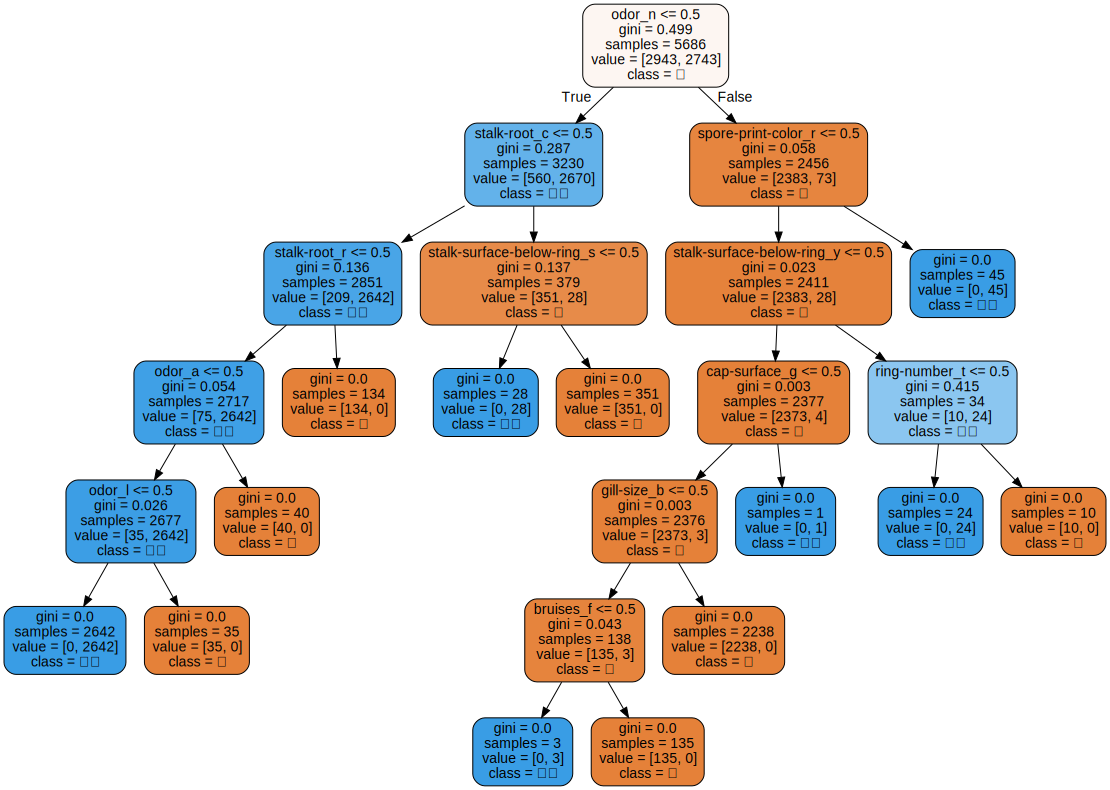

In [39]:
import graphviz

#with: 파일을 열었으면 반드시 닫아주어야 하는 데 이것을 자동으로 닫아줌 
#open(): 파일을 읽거나 쓰기위해서 연다.

with open("tree.dot",encoding="UTF8")as f:
    # 파일 읽기
    dot_graph=f.read()
    
#그래프 출력 
display(graphviz.Source(dot_graph))

In [ ]:
# 만든 트리정보를 저장 
from sklearn.tree import export_graphviz
import graphviz


#사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt, out_file='tree.dot', class_names=['독','식용'], feature_names=one_hot_X.columns,
               impurity=True, filled=True, rounded=True)



#with: 파일을 열었으면 반드시 닫아주어야 하는 데 이것을 자동으로 닫아줌 
#open(): 파일을 읽거나 쓰기위해서 연다.

with open("tree.dot",encoding="UTF8")as f:
    # 파일 읽기
    dot_graph=f.read()
    
#그래프 출력 
display(graphviz.Source(dot_graph))

## 사전 가지치기(pre_pruning)

- 트리의 복잡도를 감소시켜서 과대 적합을 줄여주는 방법
- 종류
    - max_depth: 트리의 층을 제한
    - max_leaf_nodes: leaf node의 수를 제한
    - min_samples_split: 노드를 분리하는 최소 데이터의 수를 설정 

### max_depth를 이용한 사전 가지치기

In [42]:
model_dt2=DecisionTreeClassifier(max_depth=3)
model_dt2.fit(X_train,y_train)

print(" 훈련정확도:",model_dt2.score(X_train, y_train))
print(" 테스트 정확도:",model_dt2.score(X_test,y_test))

 훈련정확도: 0.9843475202251143
 테스트 정확도: 0.9872846595570139


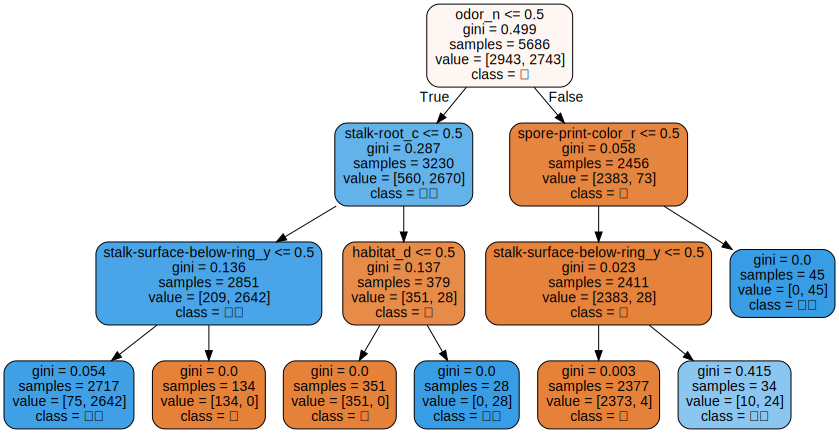

In [43]:
#사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt2, out_file='tree2.dot', class_names=['독','식용'], feature_names=one_hot_X.columns,
               impurity=True, filled=True, rounded=True)



#with: 파일을 열었으면 반드시 닫아주어야 하는 데 이것을 자동으로 닫아줌 
#open(): 파일을 읽거나 쓰기위해서 연다.

with open("tree2.dot",encoding="UTF8")as f:
    # 파일 읽기
    dot_graph=f.read()
    
#그래프 출력 
display(graphviz.Source(dot_graph))

### max_leaf_nodes를 이용한 가지치기

In [44]:
model_dt3=DecisionTreeClassifier(max_leaf_nodes=5)
model_dt3.fit(X_train,y_train)

print(" 훈련정확도:",model_dt3.score(X_train, y_train))
print(" 테스트 정확도:",model_dt3.score(X_test,y_test))

 훈련정확도: 0.9769609567358424
 테스트 정확도: 0.9799015586546349


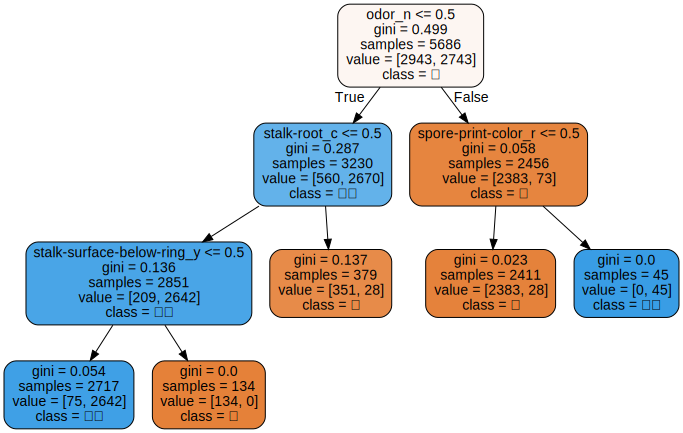

In [45]:
#사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt3, out_file='tree3.dot', class_names=['독','식용'], feature_names=one_hot_X.columns,
               impurity=True, filled=True, rounded=True)



#with: 파일을 열었으면 반드시 닫아주어야 하는 데 이것을 자동으로 닫아줌 
#open(): 파일을 읽거나 쓰기위해서 연다.

with open("tree3.dot",encoding="UTF8")as f:
    # 파일 읽기
    dot_graph=f.read()
    
#그래프 출력 
display(graphviz.Source(dot_graph))

### min_samples_split을 이용한 가지치기

In [46]:
model_dt4=DecisionTreeClassifier(min_samples_split=3000)
model_dt4.fit(X_train,y_train)

print(" 훈련정확도:",model_dt4.score(X_train, y_train))
print(" 테스트 정확도:",model_dt4.score(X_test,y_test))

 훈련정확도: 0.9454801266268027
 테스트 정확도: 0.9450369155045119


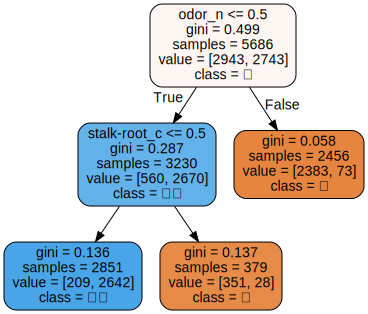

In [47]:
#사용할 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
#impurity(불순도 저장여부), filled(색칠여부), rounded(둥근사각형사용여부)
export_graphviz(model_dt4, out_file='tree4.dot', class_names=['독','식용'], feature_names=one_hot_X.columns,
               impurity=True, filled=True, rounded=True)



#with: 파일을 열었으면 반드시 닫아주어야 하는 데 이것을 자동으로 닫아줌 
#open(): 파일을 읽거나 쓰기위해서 연다.

with open("tree4.dot",encoding="UTF8")as f:
    # 파일 읽기
    dot_graph=f.read()
    
#그래프 출력 
display(graphviz.Source(dot_graph))

# 교차 검증(cross validation)
- 훈련데이터와 테스트데이터 셋을 여러개 형태로 만들어 훈련시킨 후 정확도를 평균내는 방법

In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

#cv-5 :데이터 셋의 갯수
score= cross_val_score(model_dt,X_test,y_test,cv=5)

print("교차검증 점수:",score)
print("최종점수:",np.mean(score))

교차검증 점수: [1.         1.         0.99795082 1.         0.99383984]
최종점수: 0.9983581310802169


# 정규화 
- 편향된 데이터를 정규분포로 만드는 작업
- 모델의 성능을 향상

In [55]:
data=pd.read_csv("./data/data_skew.csv")

data.head()

,0,1,2,y
0,56,18,27,2.926144
1,81,57,3,4.744364
2,25,9,11,1.439488
3,20,13,30,0.569621
4,27,13,13,1.230924


In [52]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

<BarContainer object of 249 artists>

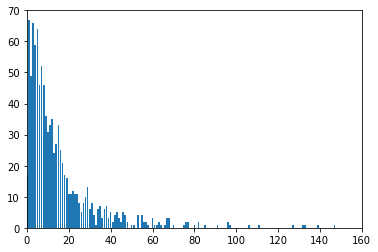

In [54]:
import matplotlib.pyplot as plt
plt.xlim(0,160)
plt.ylim(0,70)

#X 데이터의 1번 인덱스의 값들의 개수를 저장
bins=np.bincount(X.iloc[:,1])
#x 축 : 값들의 종류를 표시, y축: 값 (개수)
plt.bar(range(len(bins)),bins)

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=555)


In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)

pred_train=knn_model.predict(X_train)
pred_test=knn_model.predict(X_test)

print("훈련오차:", mean_squared_error(pred_train,y_train))
print("테스트오차:", mean_squared_error(pred_test,y_test))

훈련오차: 0.3094569314428629
테스트오차: 0.567002986324778


In [61]:
#정규분포로 만들기
# 왼쪽으로 편향되어 있으면 log()를 오른쪽으로 편향되어 있으면 exp()를 사용
X_train2=np.log(X_train+1)
X_test2=np.log(X_test+1)

#왜 log로 바꿔주면서 1을 더하는가
# log는 0에 가까워지면서 무한대로 간다. 
#1을 더하는 이유: 0이되면 log가 무한대(inf- 인피니트)가 되기떼문에 이를 방지하기 위한것

In [64]:
X_train2.iloc[:,0].skew()

-0.10017324773414837

(array([18.,  0.,  0., 28.,  0., 52.,  0., 32., 54., 81., 41., 52., 82.,
        34., 73., 58., 40., 31., 14., 23., 13., 11.,  6.,  4.,  3.]),
 array([0.        , 0.1979504 , 0.39590079, 0.59385119, 0.79180158,
        0.98975198, 1.18770237, 1.38565277, 1.58360316, 1.78155356,
        1.97950396, 2.17745435, 2.37540475, 2.57335514, 2.77130554,
        2.96925593, 3.16720633, 3.36515673, 3.56310712, 3.76105752,
        3.95900791, 4.15695831, 4.3549087 , 4.5528591 , 4.75080949,
        4.94875989]),
 <BarContainer object of 25 artists>)

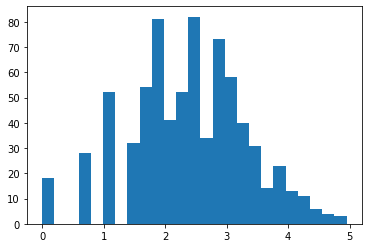

In [62]:
plt.hist(X_train2.iloc[:,0],bins=25)